> This work is done to answers the case based on Revou Mini Course for Data Analytics (Batch 26 December 2023 - 5 January 2024).

# Import Essentials

## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1BpTzPUw-VzKUWpjX0Tb2eO68LZhaTGbL4FEbuRPlxMY/edit#gid=1903509374'
url = url.replace('/edit#gid=', '/export?format=csv&gid=')

In [3]:
df = pd.read_csv(url)
df.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7


# Data Preparation

## Data Introduction

In [4]:
df.shape

(1000, 10)

> This dataset has 1000 rows with 10 columns each.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB


> Based on this information, it can be concluded that there is no need to deal with missing value since this dataset has no null and are all equal by count. However, it is still necessary to check the categorical variables to see if there is mistyped value. Additionally, based on the column names, there is a column doesn't match its name.

## Match Data Type

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 78.3+ KB


> This action need to be done so that fewer settings will be required when uploading this data to any dashboard.

## Review Categorical Data Entries

> To shorten the codes, a function will be made so that it can be reused later by only calling the function and insert the parameters needed.

In [7]:
def check_mistypedVal(col_names):
  for i, j in enumerate(col_names):
    print('==============================')
    print((i + 1), j)
    print(df[j].value_counts())

In [8]:
col_names = ['Payment', 'Branch', 'City', 'Customer type', 'Gender', 'Product line']
check_mistypedVal(col_names)

1 Payment
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64
2 Branch
Branch
A    340
B    332
C    328
Name: count, dtype: int64
3 City
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
4 Customer type
Customer type
Member    501
Normal    499
Name: count, dtype: int64
5 Gender
Gender
Female    498
Male      490
male        9
female      2
fml         1
Name: count, dtype: int64
6 Product line
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


> Based on this information, it can be concluded that this dataset is well distributed (balance) and one of the categorical variables, 'Gender', has several mistyped values.

In [9]:
dict_gender = {
    'male' : 'Male',
    'female' : 'Female',
    'fml' : 'Female'
}
df = df.replace(dict_gender)

In [10]:
check_mistypedVal(col_names)

1 Payment
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64
2 Branch
Branch
A    340
B    332
C    328
Name: count, dtype: int64
3 City
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
4 Customer type
Customer type
Member    501
Normal    499
Name: count, dtype: int64
5 Gender
Gender
Female    501
Male      499
Name: count, dtype: int64
6 Product line
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


> Hence, it can be concluded that there is no more mistyped values in those categorical variables.

## Remove Duplicates

> The fact is, there is no information on how this dataset compiled since there is no information about this. However, mistakes are common to happen. There is possibilities that the same sales transaction got scanned and inputted doubled or even tripled.

> It is possible that there are transactions having the same item and quantity and be purchased by the same or different customers. Every sales transaction must have a key or an ID that can be used to differentiate every transactions. Hence, to know and remove the duplicates in this dataset, it is necessary to check if there is duplicate in 'Invoice ID' column.

In [11]:
df['Invoice ID'].duplicated().sum()

0

> Based on this information, it can be concluded that there is no duplicate transaction in this dataset.

## Add Essential Column

> Essential columns can also be added if needed.

In [12]:
df['Revenue'] = df['Unit price'] * df['Quantity']
df.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


# Exploratory Data Analysis (EDA)

In [13]:
def visualize(df, x, y, z, title, type):
  plt.figure(figsize=(20, 5))
  if (type == 'line'):
    plt.plot(x, y, data=df, marker='o')
  elif (type == 'bar'):
    df = df.sort_values(y, ascending=True).head(min(df[x].nunique(), 10))
    plt.bar(x, y, data=df.sort_values(y, ascending=False))
  elif (type == 'grouped-bar'):
    df = df.sort_values(z, ascending=True)
    sns.barplot(x=x, y=y, hue=z, data=df)
  else:
    df = df.sort_values(x, ascending=True).head(min(df[x].nunique(), 10))
    plt.pie(df[y], labels=df[x], autopct='%.2lf%%')
  plt.title(title)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

## Daily Trend

> This shows daily trend as the sum of Quantity and Revenue each day, sorted by Date.

In [14]:
eda_trend = df.groupby('Date', as_index=False).agg({'Quantity' : 'sum', 'Revenue' : 'sum'})
eda_trend.head()

,Date,Quantity,Revenue
0,2019-01-01,81,4519.22
1,2019-01-02,48,1852.86
2,2019-01-03,37,1979.17
3,2019-01-04,32,1546.37
4,2019-01-05,55,3368.27


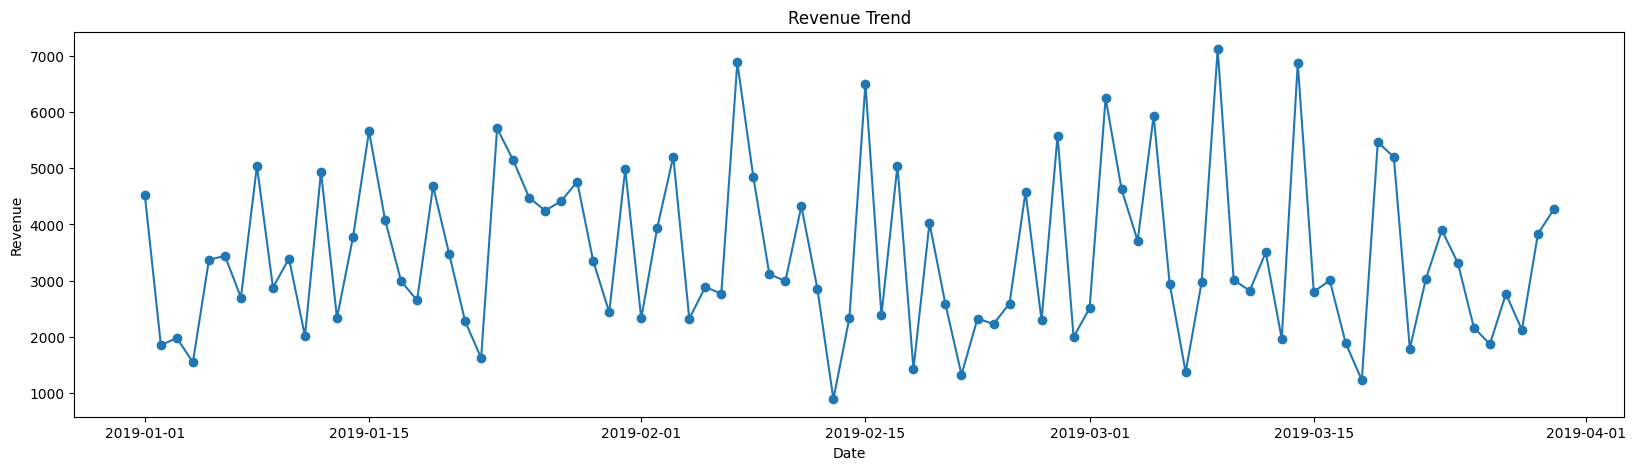

In [15]:
visualize(eda_trend, 'Date', 'Revenue', '', 'Revenue Trend', 'line')

> Based on this information, it can be concluded that the highest Revenue is achieved on the first week of February and the lowest Revenue is achieved on the second week of February.

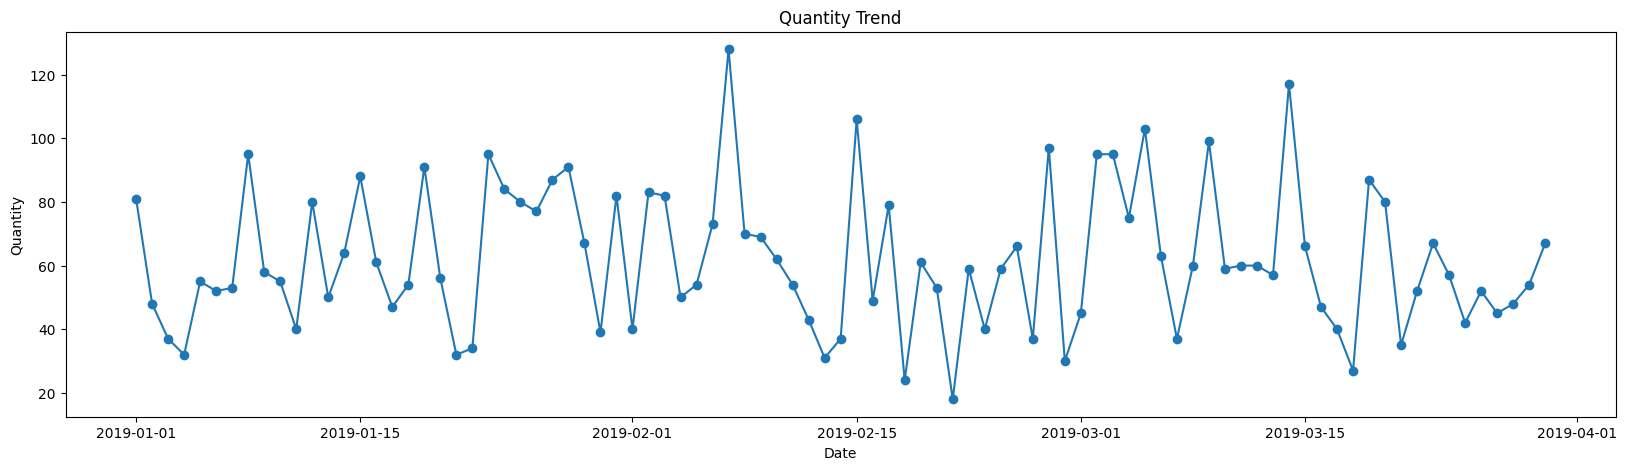

In [16]:
visualize(eda_trend, 'Date', 'Quantity', '', 'Quantity Trend', 'line')

> Based on this information, it can be concluded that the highest Quantity is achieved on the first week of February and the lowest Quantity is achieved on the forth week of February.

## Revenue

### Revenue by Payment

In [17]:
eda_payment = df.groupby('Payment', as_index=False).agg({'Revenue' : 'sum', 'Invoice ID' : 'nunique'})
eda_payment.head()

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


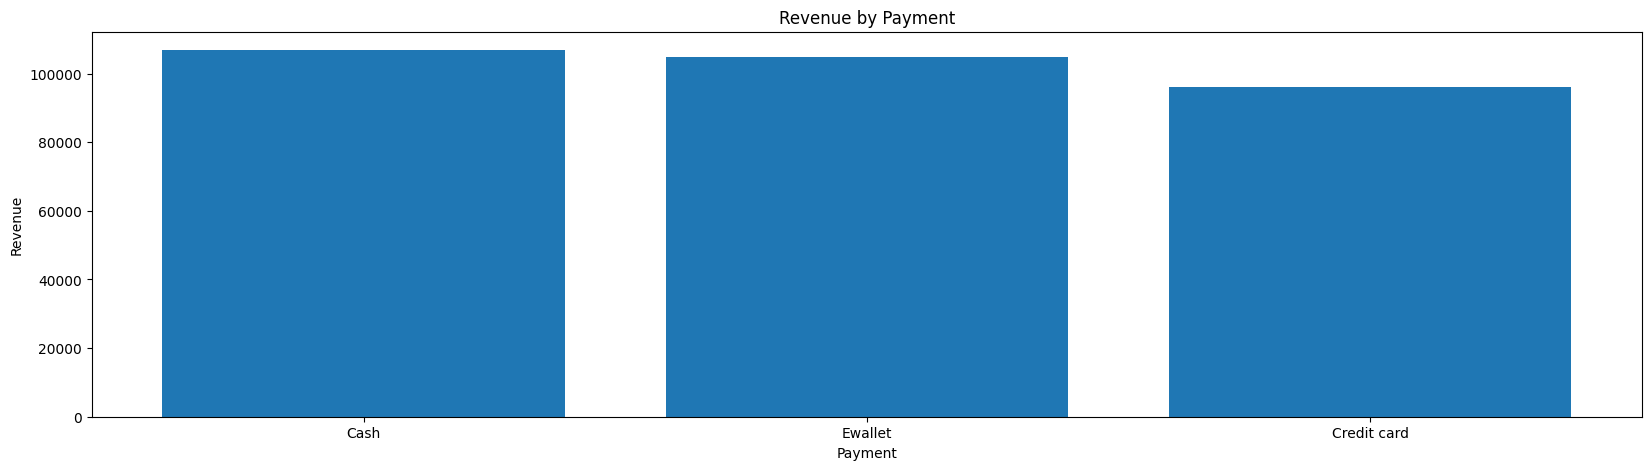

In [18]:
visualize(eda_payment, 'Payment', 'Revenue', '', 'Revenue by Payment', 'bar')

> Based on this information, it can be concluded that the payment type with the highest revenue is Cash and the payment type with the lowest revenue is Credit Card.

> Based on this information, it can be considered that since many people now prefer cashless payments, it might be worth considering eliminating cash as an option. However, given that a lot of transactions at this store are still made with cash, it's important not to eliminate it entirely.

### Revenue by Branch

In [19]:
eda_branch = df.groupby('Branch', as_index=False).agg({'Revenue' : 'sum', 'Invoice ID' : 'nunique'})
eda_branch.head()

,Branch,Revenue,Invoice ID
0,A,101143.21,340
1,B,101140.64,332
2,C,105303.53,328


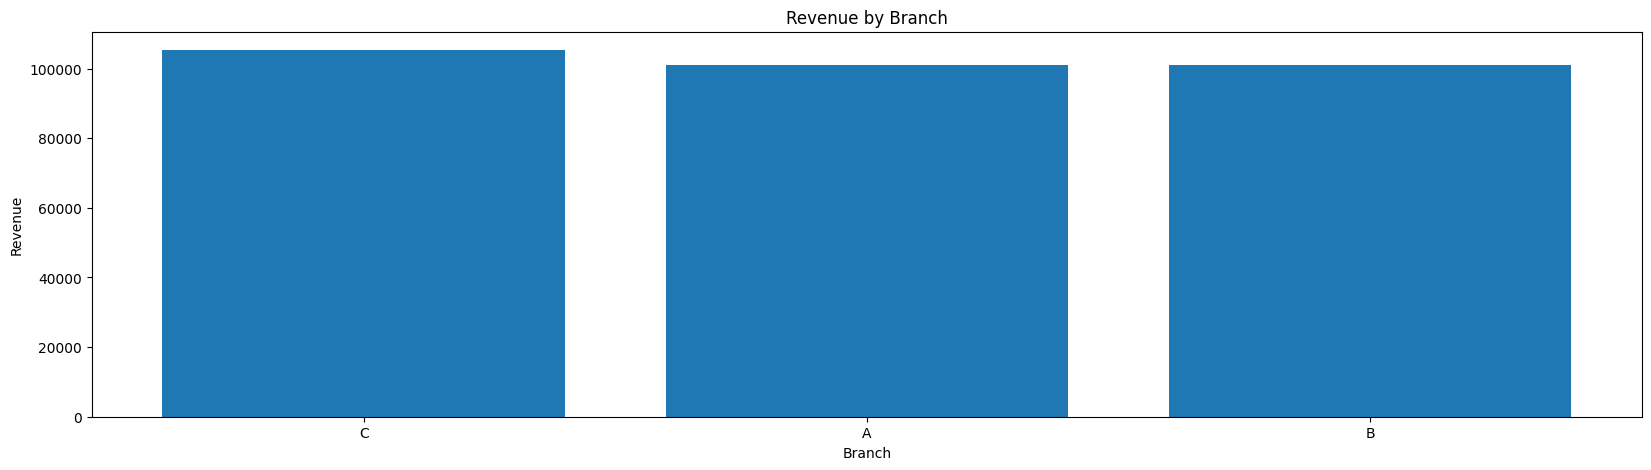

In [20]:
visualize(eda_branch, 'Branch', 'Revenue', '', 'Revenue by Branch', 'bar')

> Based on this information, it can be concluded that the branch with the highest revenue is C and the branch with the lowest revenue is B.

### Revenue by City

In [21]:
eda_city = df.groupby('City', as_index=False).agg({'Revenue' : 'sum', 'Invoice ID' : 'nunique'})
eda_city.head()

,City,Revenue,Invoice ID
0,Mandalay,101140.64,332
1,Naypyitaw,105303.53,328
2,Yangon,101143.21,340


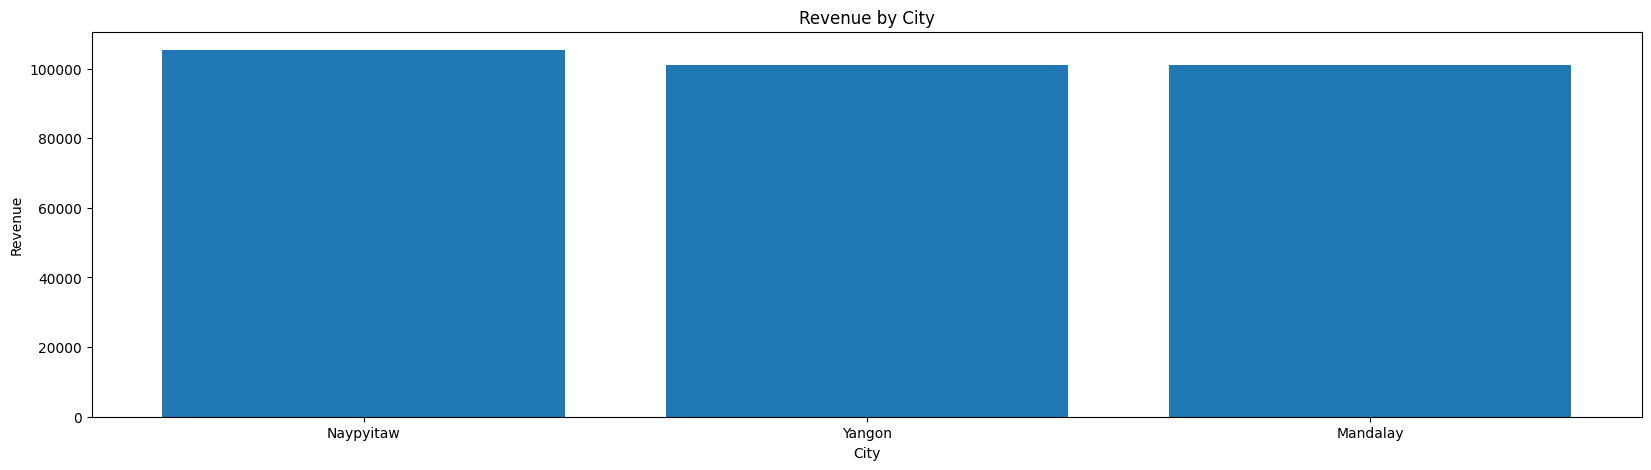

In [22]:
visualize(eda_city, 'City', 'Revenue', '', 'Revenue by City', 'bar')

> Based on this information, it can be concluded that the city with the highest revenue is Naypyitaw and the city with the lowest revenue is Mandalay.

> Based on this information, it can be considered why transactions are high or low in this city, perhaps because it's a metropolitan area, or maybe there are fewer game stores and less competitors there. This insight could help in deciding where to open the next branch.

### Revenue by Customer Type

In [23]:
eda_customerType = df.groupby('Customer type', as_index=False).agg({'Revenue' : 'sum', 'Invoice ID' : 'nunique'})
eda_customerType.head()

,Customer type,Revenue,Invoice ID
0,Member,156403.28,501
1,Normal,151184.10,499


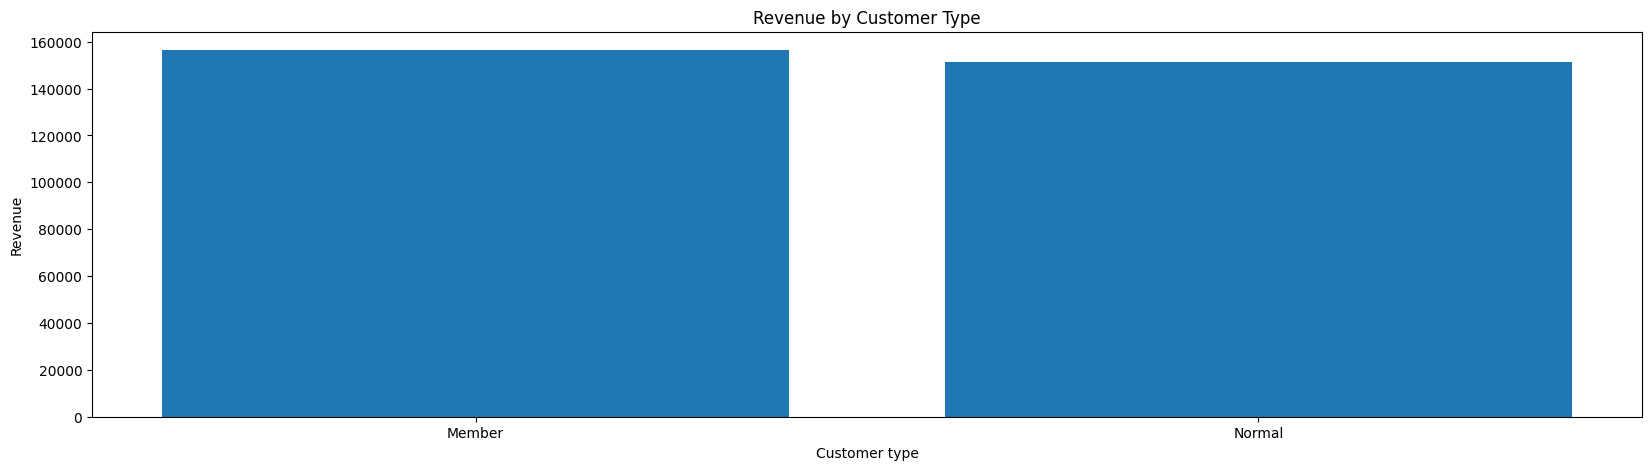

In [24]:
visualize(eda_customerType, 'Customer type', 'Revenue', '', 'Revenue by Customer Type', 'bar')

> Based on this information, it can be concluded that the customer type with the highest revenue is Member and the customer type with the lowest revenue is Normal.

> Based on this information, it can be considered whether the customer type significantly influences total transactions. For example, if members receive rewards or discounts, it might be very beneficial. This should be evaluated for future strategy in marketing.

### Revenue by Gender

In [25]:
eda_gender = df.groupby('Gender', as_index=False).agg({'Revenue' : 'sum', 'Invoice ID' : 'nunique'})
eda_gender.head()

,Gender,Revenue,Invoice ID
0,Female,159888.50,501
1,Male,147698.88,499


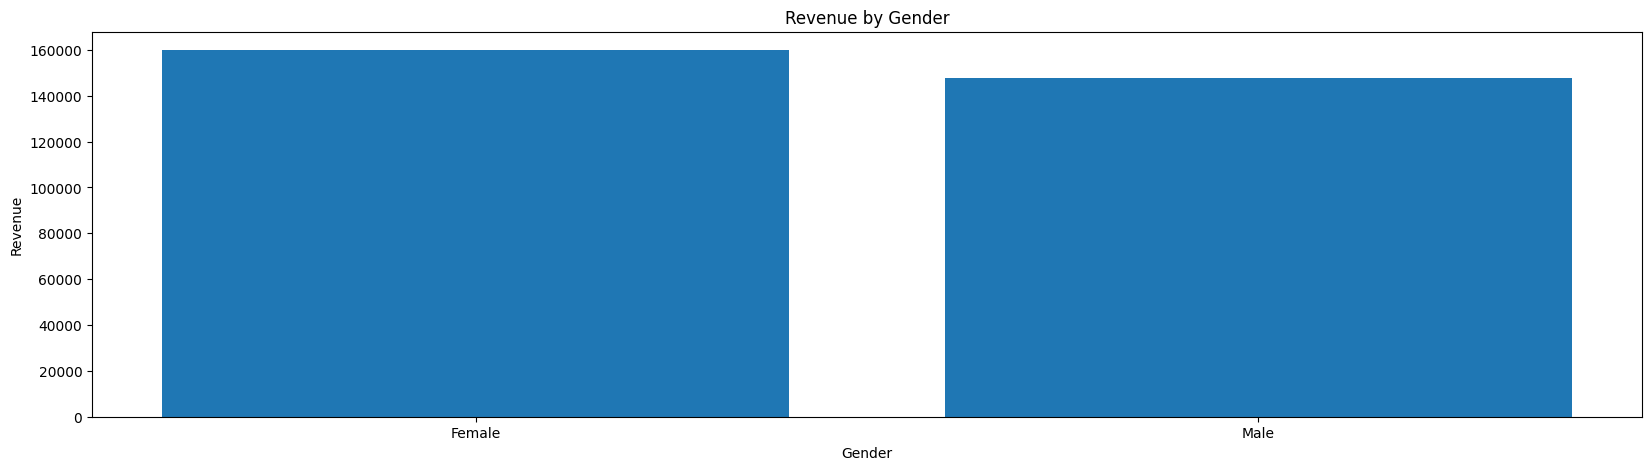

In [26]:
visualize(eda_gender, 'Gender', 'Revenue', '', 'Revenue by Gender', 'bar')

> Based on this information, it can be concluded that the gender of customer with the highest revenue is Female and the gender of customer with the lowest revenue is Male.

## Transaction Count

### Transaction Count by Payment

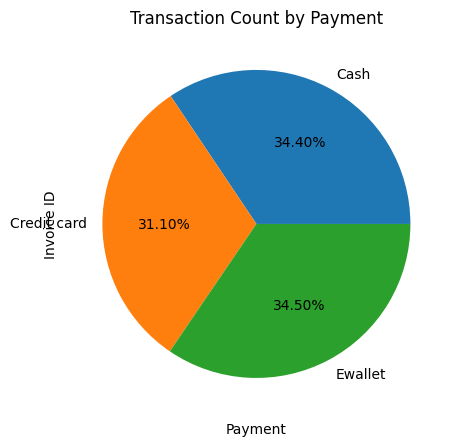

In [27]:
visualize(eda_payment, 'Payment', 'Invoice ID', '', 'Transaction Count by Payment', 'pie')

> Based on this information, it can be concluded that the most used payment method is E-Wallet and the least used payment method is Credit Card.

### Transaction Count by Branch

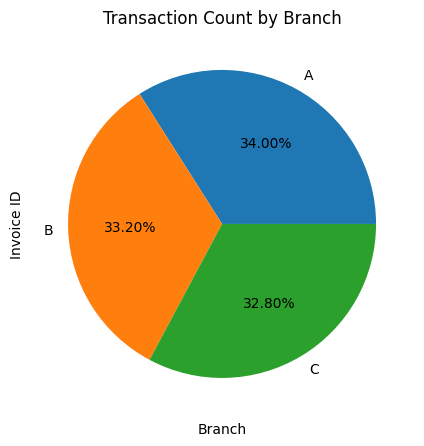

In [28]:
visualize(eda_branch, 'Branch', 'Invoice ID', '', 'Transaction Count by Branch', 'pie')

> Based on this information, it can be concluded that the highest performing branch in terms of total transaction is A and the lowest performing branch in terms of total transaction is C.

### Transaction Count by City

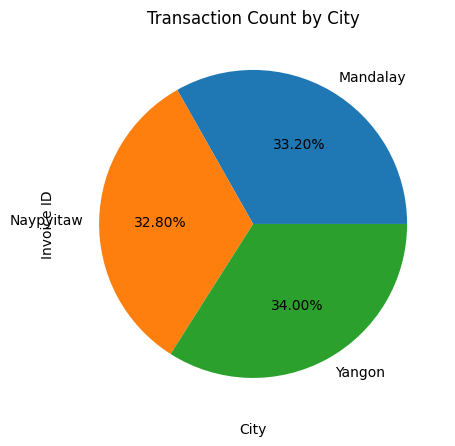

In [29]:
visualize(eda_city, 'City', 'Invoice ID', '', 'Transaction Count by City', 'pie')

> Based on this information, it can be concluded tha the highest performing city in terms of total transaction is Yangon and the lowest performing city in terms of total transaction is Naypyitaw.

### Transaction Count by Customer Type

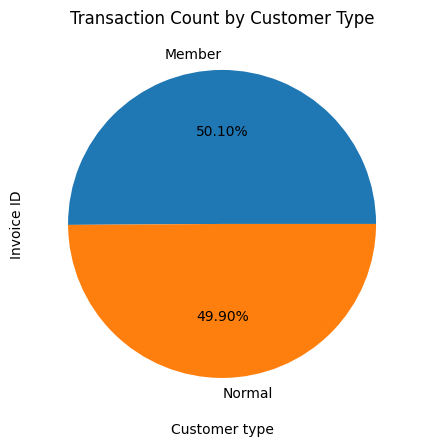

In [30]:
visualize(eda_customerType, 'Customer type', 'Invoice ID', '', 'Transaction Count by Customer Type', 'pie')

> Based on this information, it can be concluded that the customer type generating the highest total of transaction is Member and the customer type generating the highest total of transaction is Normal.

### Transaction Count by Gender

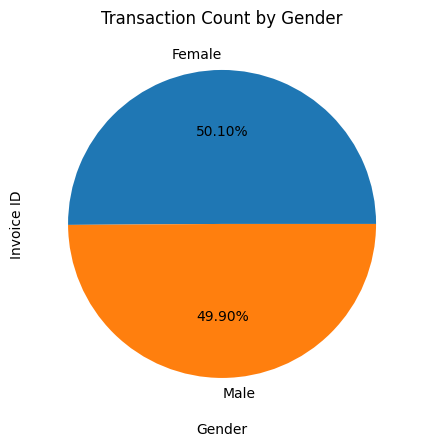

In [31]:
visualize(eda_gender, 'Gender', 'Invoice ID', '', 'Transaction Count by Gender', 'pie')

> Based on this information, it can be concluded that the gender of customer generating the highest total of transaction is Female and the gender of customer generating the highest total of transaction is Male.

## Product Line

### Product Line by Payment

In [32]:
eda_payment_2 = df.groupby(['Payment', 'Product line'], as_index=False).agg({'Invoice ID' : 'nunique'})
eda_payment_2.head()

,Payment,Product line,Invoice ID
0,Cash,Electronic accessories,71
1,Cash,Fashion accessories,57
2,Cash,Food and beverages,57
3,Cash,Health and beauty,49
4,Cash,Home and lifestyle,51


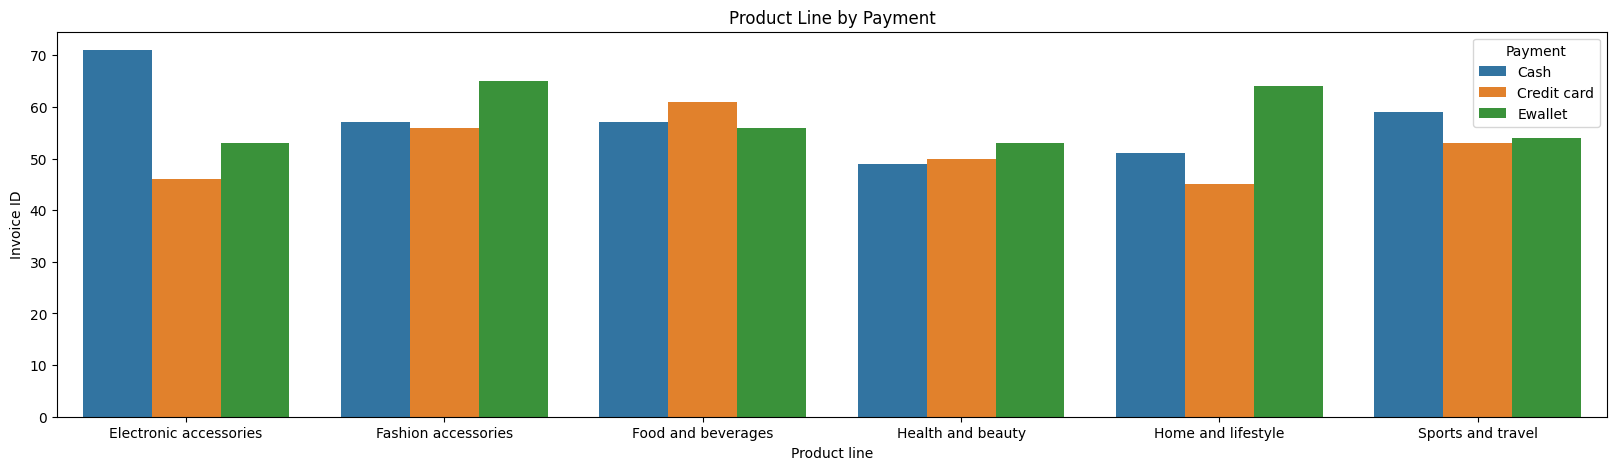

In [33]:
visualize(eda_payment_2, 'Product line', 'Invoice ID', 'Payment', 'Product Line by Payment', 'grouped-bar')

> Based on this information, it can be concluded that there is a significant difference in payment methods across different product lines. This suggests a potential opportunity for collaboration with e-wallets or credit card companies. For instance, the Home and Lifestyle product line shows a strong preference for e-wallets according to the graph, indicating that partnering with e-wallets could be beneficial. Alternatively, collaborating with credit card companies could attract more consumers to use credit cards, potentially due to the higher costs of Home and Lifestyle products. Offering promotions through these partnerships could make products more affordable and boost sales.

### Product Line by Branch

In [34]:
eda_branch_2 = df.groupby(['Branch', 'Product line'], as_index=False).agg({'Invoice ID' : 'nunique'})
eda_branch_2.head()

,Branch,Product line,Invoice ID
0,A,Electronic accessories,60
1,A,Fashion accessories,51
2,A,Food and beverages,58
3,A,Health and beauty,47
4,A,Home and lifestyle,65


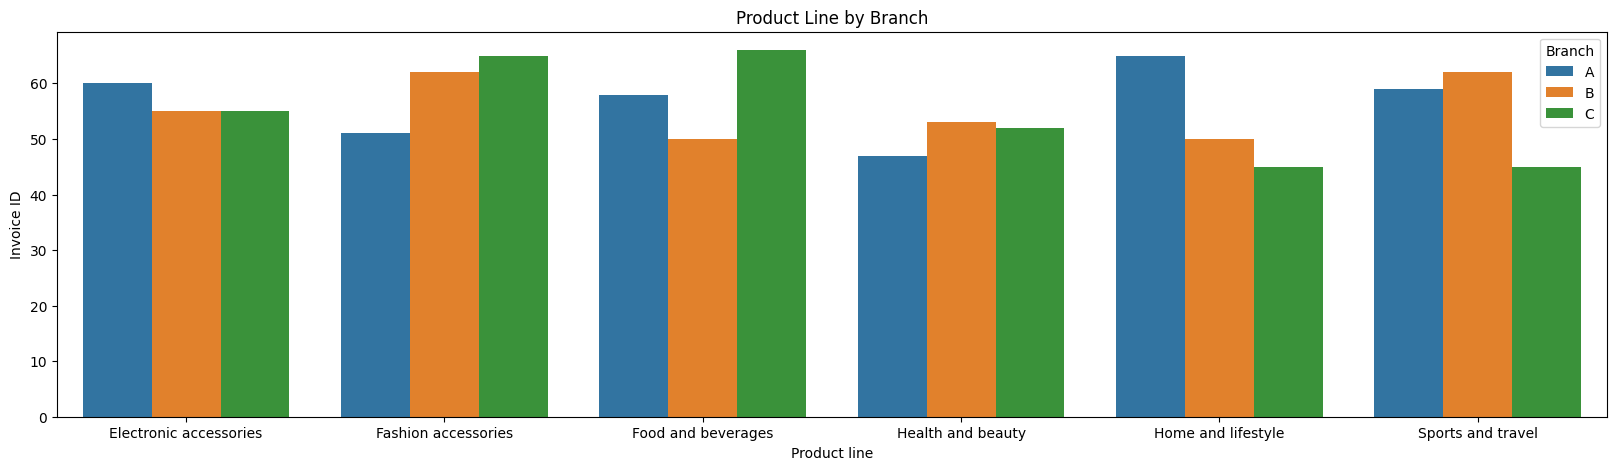

In [35]:
visualize(eda_branch_2, 'Product line', 'Invoice ID', 'Branch', 'Product Line by Branch', 'grouped-bar')

### Product Line by City

In [36]:
eda_city_2 = df.groupby(['City', 'Product line'], as_index=False).agg({'Invoice ID' : 'nunique'})
eda_city_2.head()

,City,Product line,Invoice ID
0,Mandalay,Electronic accessories,55
1,Mandalay,Fashion accessories,62
2,Mandalay,Food and beverages,50
3,Mandalay,Health and beauty,53
4,Mandalay,Home and lifestyle,50


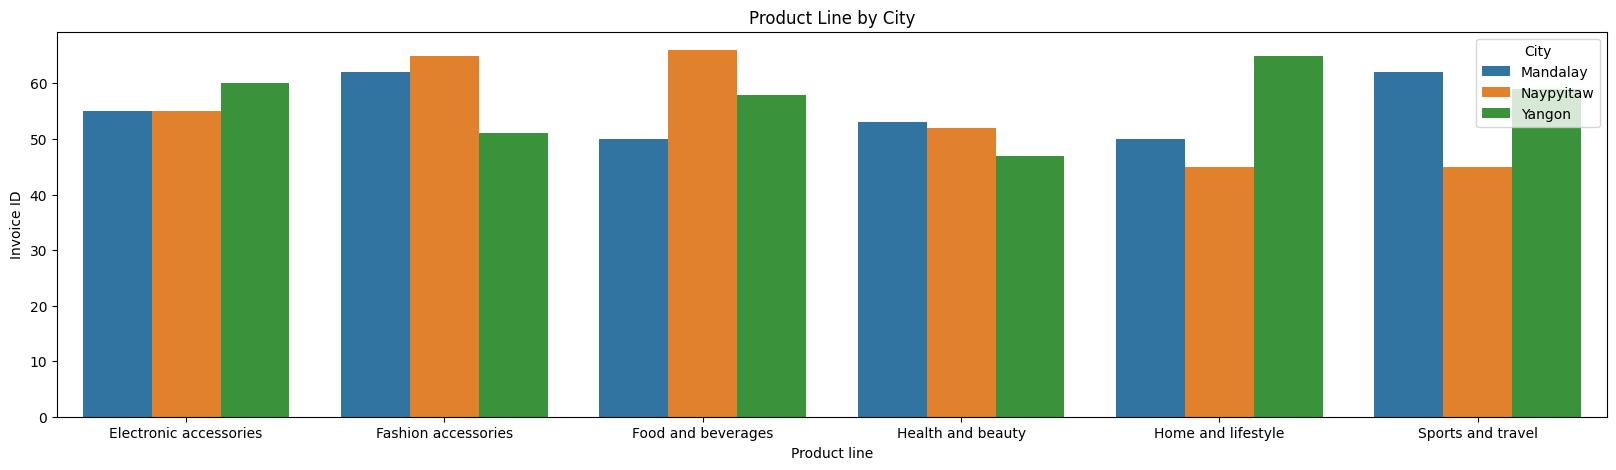

In [37]:
visualize(eda_city_2, 'Product line', 'Invoice ID', 'City', 'Product Line by City', 'grouped-bar')

### Product Line by Gender

In [38]:
eda_gender = df.groupby(['Gender', 'Product line'], as_index=False).agg({'Invoice ID' : 'nunique'})
eda_gender.head()

,Gender,Product line,Invoice ID
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79


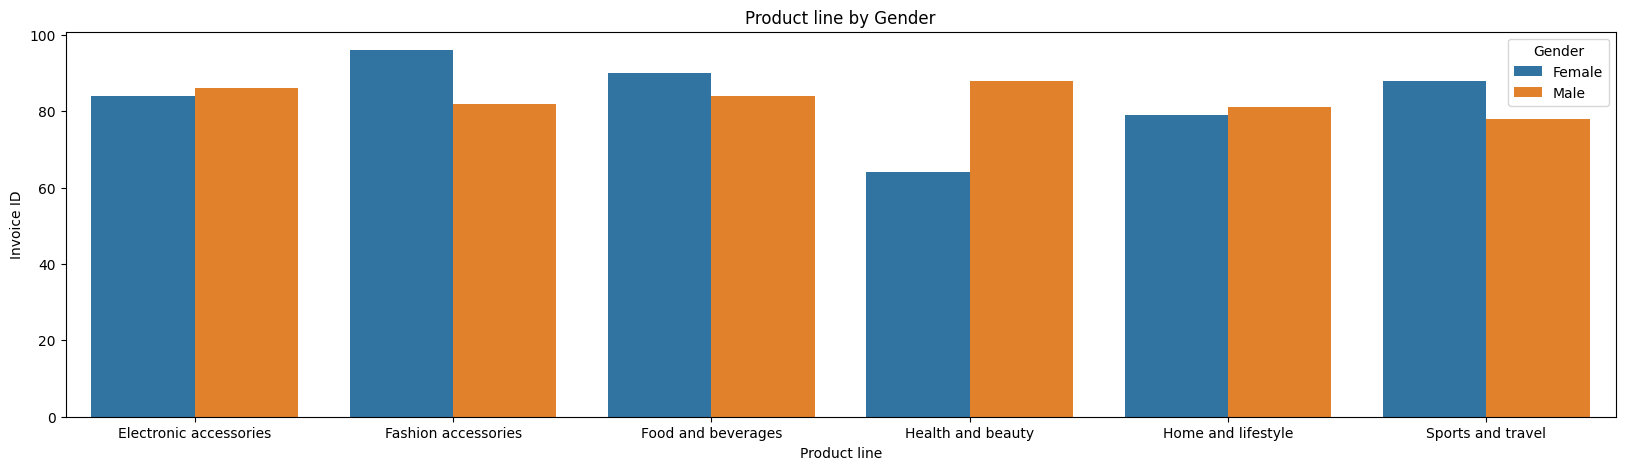

In [39]:
visualize(eda_gender, 'Product line', 'Invoice ID', 'Gender', 'Product line by Gender', 'grouped-bar')

> Based on this information, it can be concluded that segmenting the product line by gender allows for targeted marketing strategies. As example, since Health and Beauty products are predominantly purchased by females and Sports and Travel by males, tailored promotions can be created to boost sales. Additionally, offering a wider variety of products for the less represented gender in each product line could help balance demand and increase overall sales.

## Get the Data ready

In [40]:
df.to_csv('dataset/invoice_output.csv', index=False)

# Data Visualization

> Data Visualization will be conducted on Looker Studio/Google Data Studio and can be accessed by this link:
https://lookerstudio.google.com/reporting/93341d45-e33c-4599-941c-ae6c16d3ca19